In [1]:
!nvidia-smi

Thu Feb 27 12:04:27 2025       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.82.01    Driver Version: 470.82.01    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K40m          Off  | 00000000:0B:00.0 Off |                    0 |
| N/A   35C    P0    69W / 235W |      0MiB / 11441MiB |     97%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.set_option('display.max_colwidth', None)
from scipy.spatial.distance import cdist
import warnings
warnings.filterwarnings('ignore')

In [6]:
train = pd.read_csv('insurancePrediction.csv')

In [7]:
train.shape

(278860, 20)

In [8]:
train.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,56.0,Male,99990.0,Married,1.0,Master's,NaN,31.074627,Urban,Comprehensive,NaN,13,320.0,5,308.0,2022-12-10 15:21:39.078837,Poor,Yes,Daily,Condo
1,46.0,Male,2867.0,Single,1.0,Bachelor's,NaN,50.271335,Urban,Comprehensive,NaN,3,694.0,4,517.0,2023-01-31 15:21:39.078837,Good,Yes,Monthly,House
2,32.0,Female,30154.0,Divorced,3.0,Bachelor's,NaN,14.714909,Suburban,Comprehensive,2.0,16,652.0,8,849.0,2023-11-26 15:21:39.078837,Poor,No,Monthly,House
3,60.0,Female,48371.0,Divorced,0.0,PhD,Self-Employed,25.346926,Rural,Comprehensive,1.0,11,330.0,7,927.0,2023-02-27 15:21:39.078837,Poor,No,Rarely,Condo
4,25.0,Female,54174.0,Divorced,0.0,High School,Self-Employed,6.659499,Urban,Comprehensive,NaN,9,NaN,8,303.0,2020-11-25 15:21:39.078837,Poor,No,Rarely,Condo


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278860 entries, 0 to 278859
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Age                   274175 non-null  float64
 1   Gender                278860 non-null  object 
 2   Annual Income         264905 non-null  float64
 3   Marital Status        273841 non-null  object 
 4   Number of Dependents  250974 non-null  float64
 5   Education Level       278860 non-null  object 
 6   Occupation            197572 non-null  object 
 7   Health Score          268263 non-null  float64
 8   Location              278860 non-null  object 
 9   Policy Type           278860 non-null  object 
 10  Previous Claims       197572 non-null  float64
 11  Vehicle Age           278860 non-null  int64  
 12  Credit Score          250974 non-null  float64
 13  Insurance Duration    278860 non-null  int64  
 14  Premium Amount        277019 non-null  float64
 15  

In [10]:
train.describe()

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,274175.000000,264905.000000,250974.000000,268263.000000,197572.000000,278860.000000,250974.000000,278860.000000,277019.000000
mean,41.020771,42089.085329,1.998048,28.584290,0.998117,9.520283,574.362049,5.007764,966.118667
std,13.549683,35444.517255,1.412312,15.966208,1.000795,5.767915,158.792037,2.581349,909.404567
min,18.000000,0.000000,0.000000,0.035436,0.000000,0.000000,300.000000,1.000000,0.000000
25%,29.000000,13588.000000,1.000000,16.149890,0.000000,5.000000,437.000000,3.000000,286.000000
50%,41.000000,32191.000000,2.000000,26.451244,1.000000,10.000000,575.000000,5.000000,688.000000
75%,53.000000,62164.000000,3.000000,38.966369,2.000000,15.000000,712.000000,7.000000,1367.000000
max,64.000000,149997.000000,4.000000,93.876090,9.000000,19.000000,849.000000,9.000000,4999.000000


In [11]:
train.isna().sum()

Age                      4685
Gender                      0
Annual Income           13955
Marital Status           5019
Number of Dependents    27886
Education Level             0
Occupation              81288
Health Score            10597
Location                    0
Policy Type                 0
Previous Claims         81288
Vehicle Age                 0
Credit Score            27886
Insurance Duration          0
Premium Amount           1841
Policy Start Date           0
Customer Feedback       18349
Smoking Status              0
Exercise Frequency          0
Property Type               0
dtype: int64

In [12]:
train.groupby('Location')['Premium Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Location,,,,,,,,
Rural,92036.0,966.011354,912.423220,0.0,285.0,686.0,1365.0,4997.0
Suburban,92873.0,965.407966,905.653692,0.0,286.0,691.0,1369.0,4999.0
Urban,92110.0,966.942482,910.166374,0.0,287.0,688.0,1366.0,4999.0


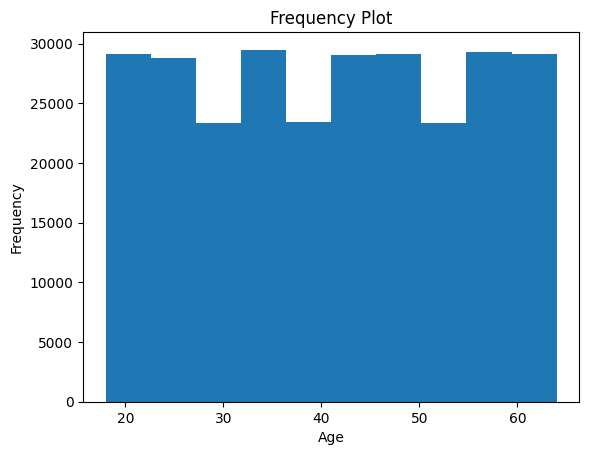

In [13]:
plt.hist(train['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Frequency Plot')
plt.show()

## Even Age distribution

<Axes: xlabel='Gender'>

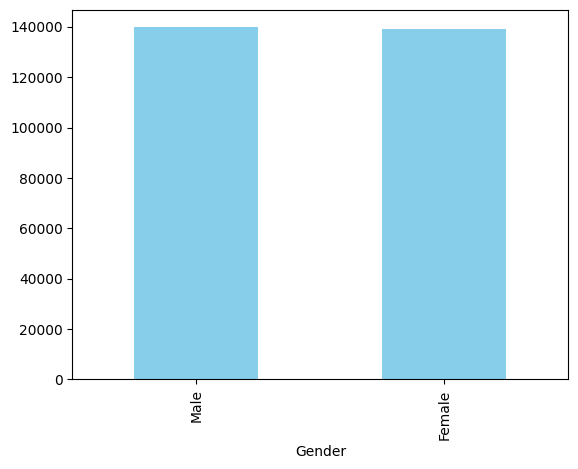

In [14]:
train['Gender'].value_counts().plot(kind='bar',color='skyblue')

## Even gender distribution

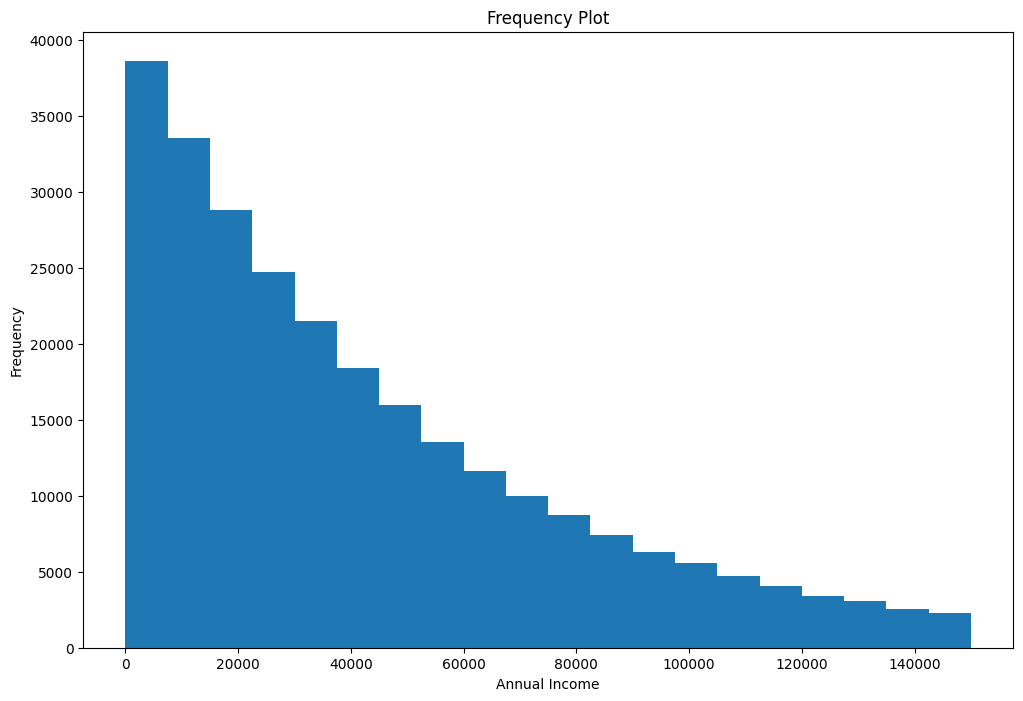

In [15]:
plt.figure(figsize=(12,8))
plt.hist(train['Annual Income'],bins=20)
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.title('Frequency Plot')
plt.show()

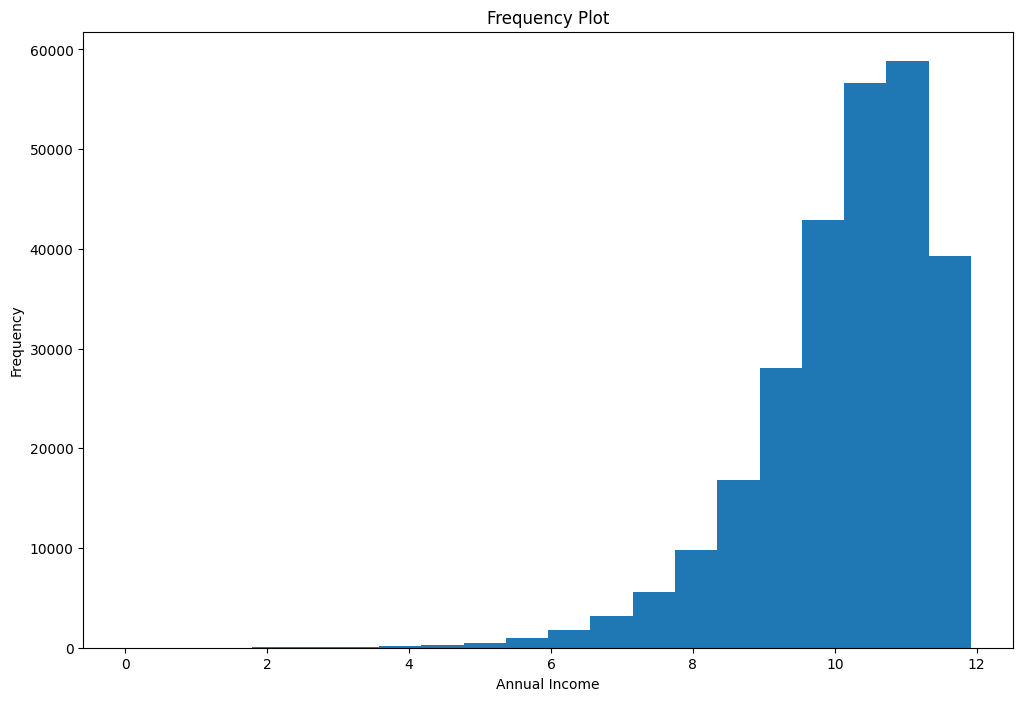

In [16]:
plt.figure(figsize=(12,8))
plt.hist(np.log1p(train['Annual Income']),bins=20)
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.title('Frequency Plot')
plt.show()

<Axes: xlabel='Marital Status'>

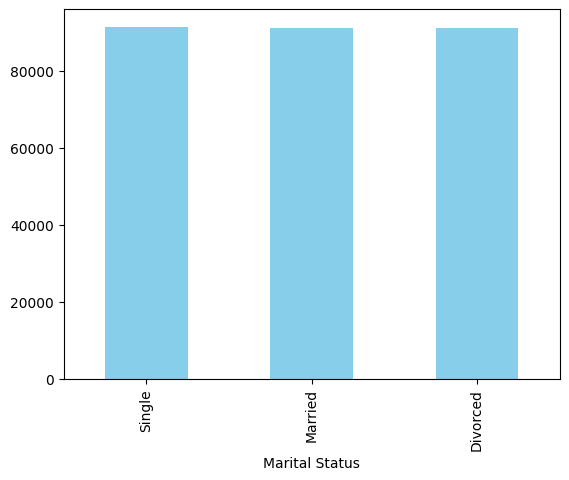

In [17]:
train['Marital Status'].value_counts().plot(kind='bar',color='skyblue')

<Axes: xlabel='Number of Dependents'>

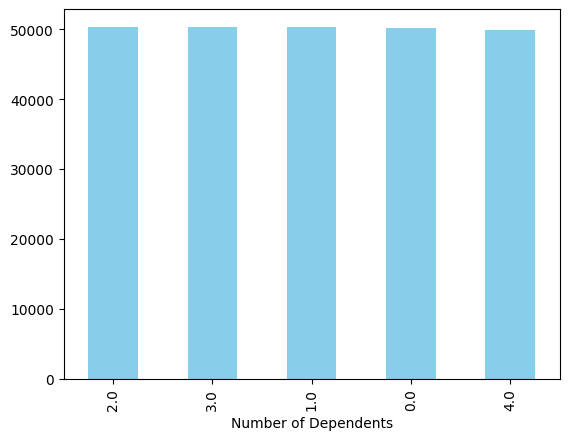

In [18]:
train['Number of Dependents'].value_counts().plot(kind='bar',color='skyblue')

<Axes: xlabel='Education Level'>

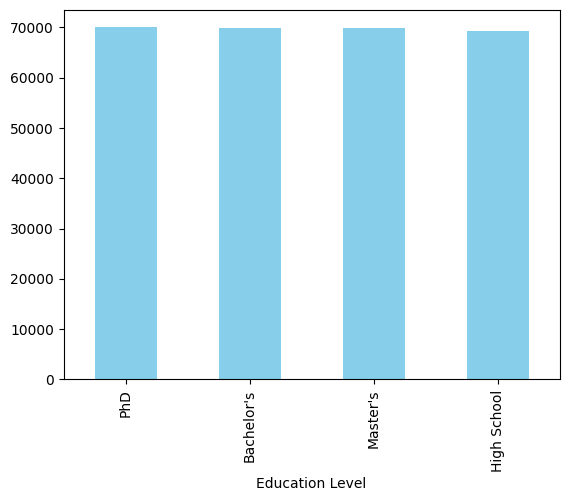

In [19]:
train['Education Level'].value_counts().plot(kind='bar',color='skyblue')

<Axes: xlabel='Occupation'>

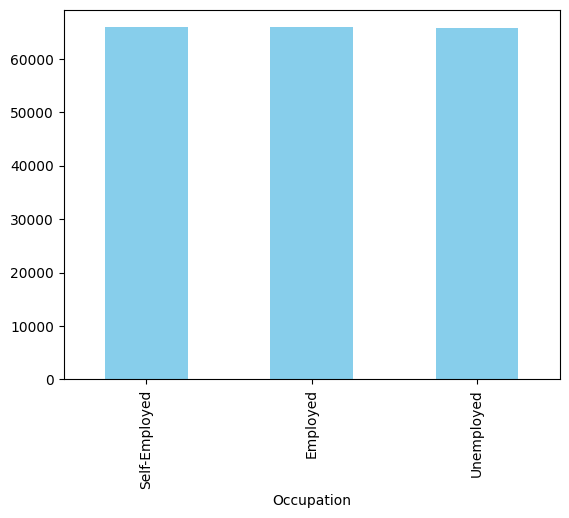

In [20]:
train['Occupation'].value_counts().plot(kind='bar',color='skyblue')

<Axes: xlabel='Location'>

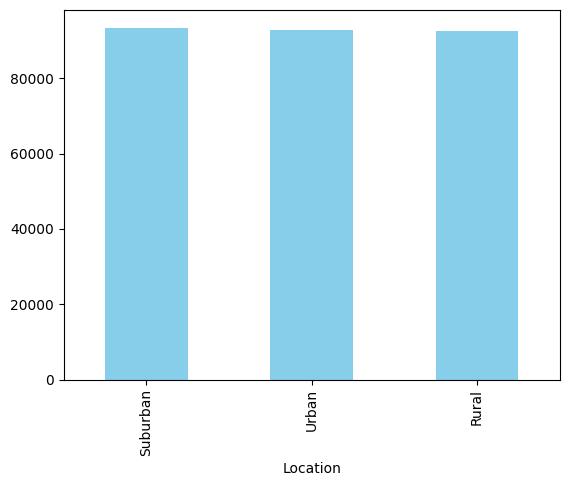

In [21]:
train['Location'].value_counts().plot(kind='bar',color='skyblue')

In [22]:
train['Location'].value_counts()

Location
Suburban    93482
Urban       92719
Rural       92659
Name: count, dtype: int64

<Axes: xlabel='Policy Type'>

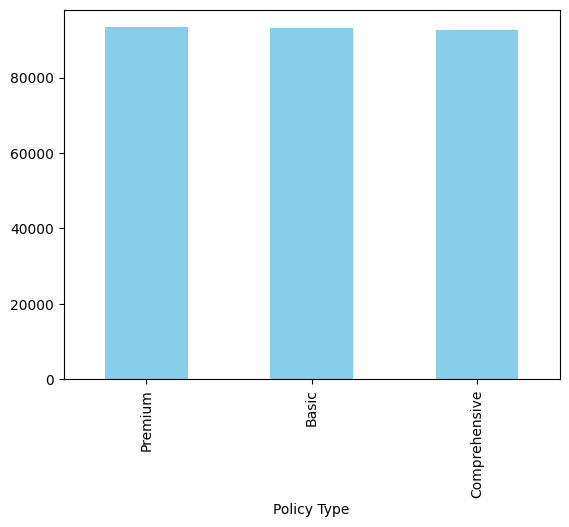

In [23]:
train['Policy Type'].value_counts().plot(kind='bar',color='skyblue')

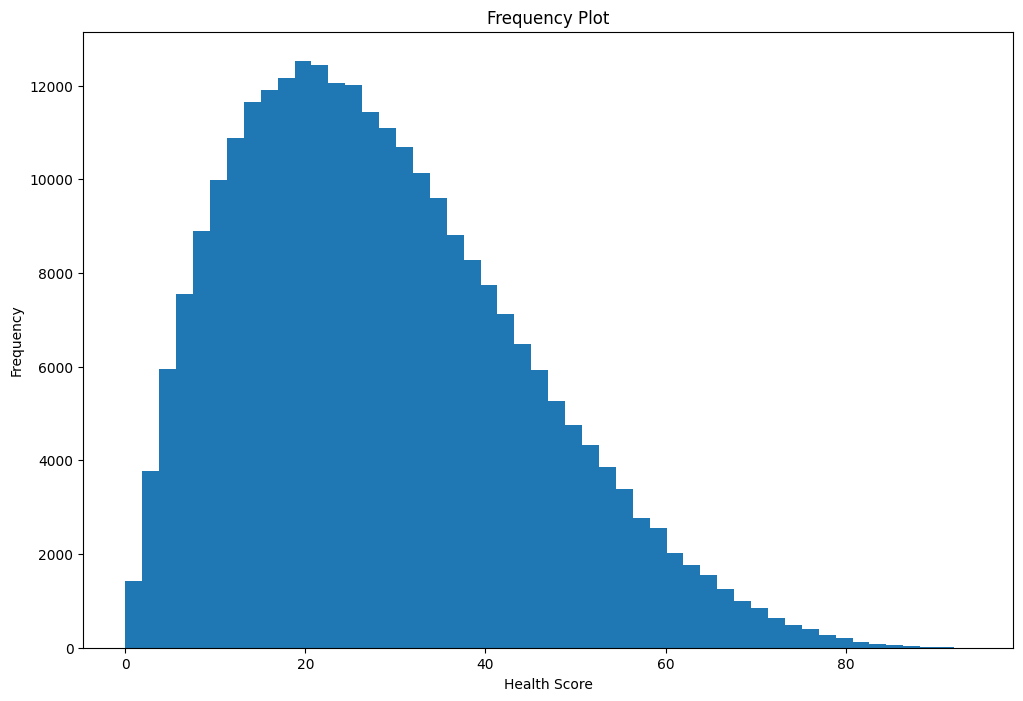

In [24]:
plt.figure(figsize=(12,8))
plt.hist(train['Health Score'],bins=50)
plt.xlabel('Health Score')
plt.ylabel('Frequency')
plt.title('Frequency Plot')
plt.show()

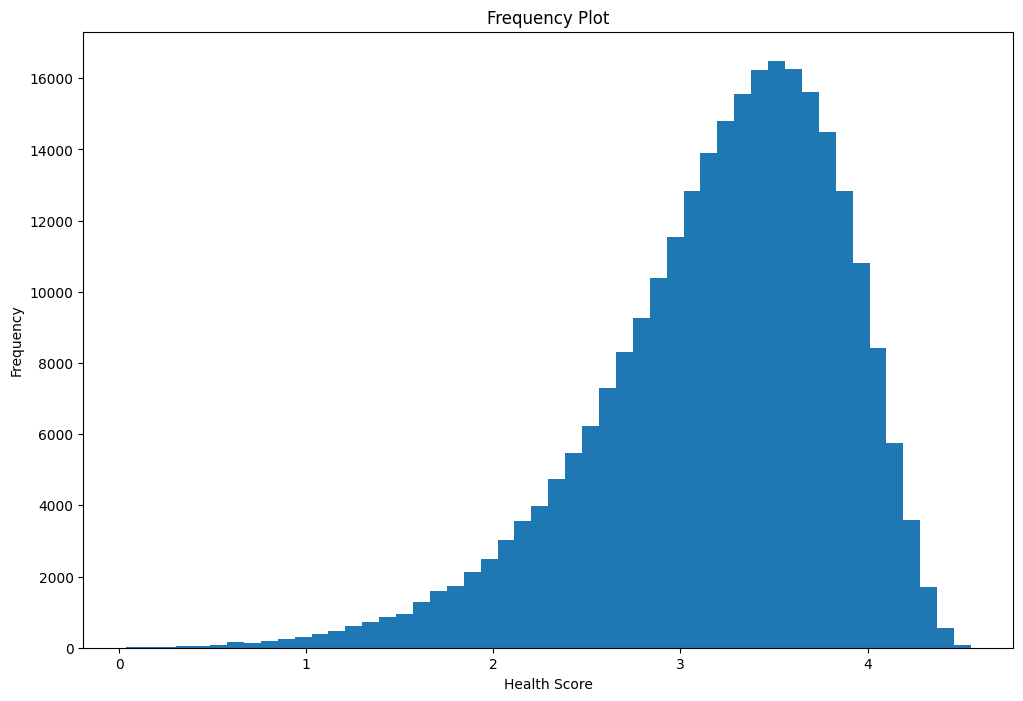

In [25]:
plt.figure(figsize=(12,8))
plt.hist(np.log1p(train['Health Score']),bins=50)
plt.xlabel('Health Score')
plt.ylabel('Frequency')
plt.title('Frequency Plot')
plt.show()

In [26]:
train.columns

Index(['Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Premium Amount',
       'Policy Start Date', 'Customer Feedback', 'Smoking Status',
       'Exercise Frequency', 'Property Type'],
      dtype='object')

In [ ]:
plt.figure(figsize=(12,8))
train['Previous Claims'].value_counts().plot(kind='bar',color='red')

<Axes: xlabel='Vehicle Age'>

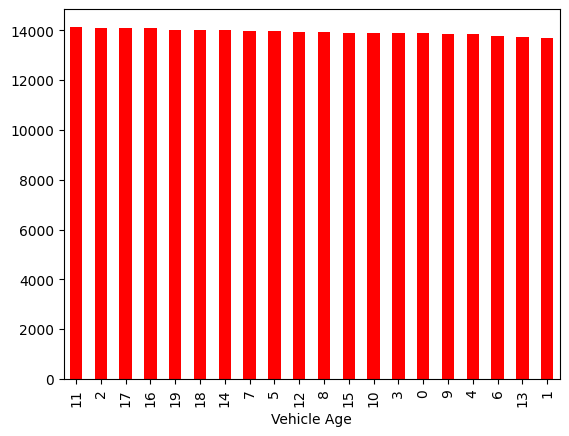

In [27]:
train['Vehicle Age'].value_counts().plot(kind='bar',color='red')

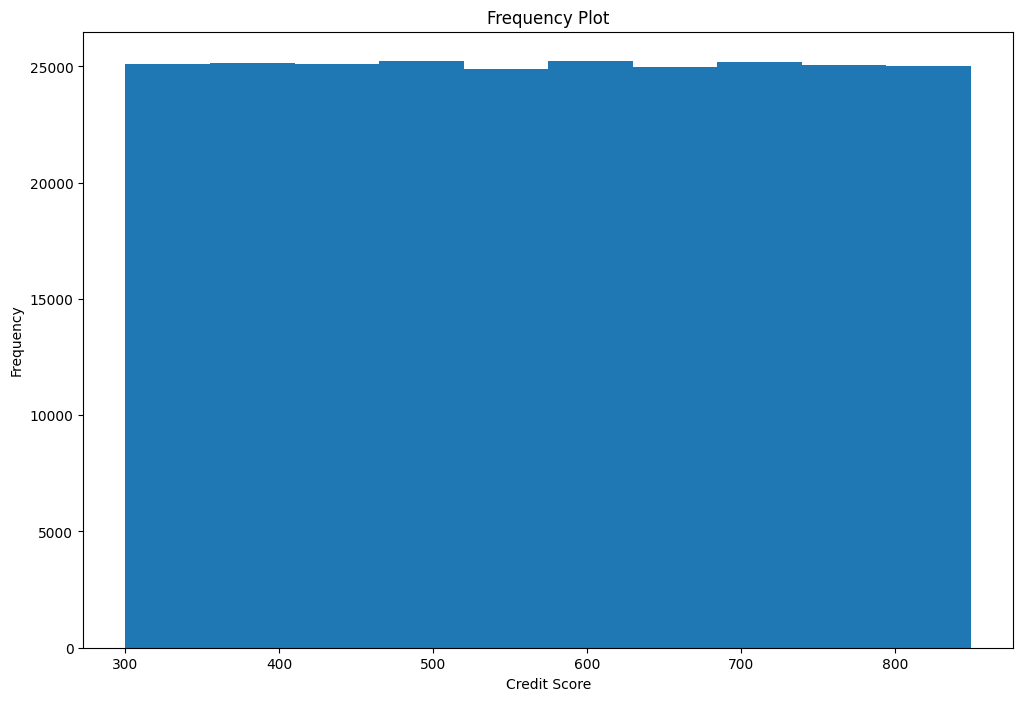

In [28]:
plt.figure(figsize=(12,8))
plt.hist(train['Credit Score'],bins=10)
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.title('Frequency Plot')
plt.show()

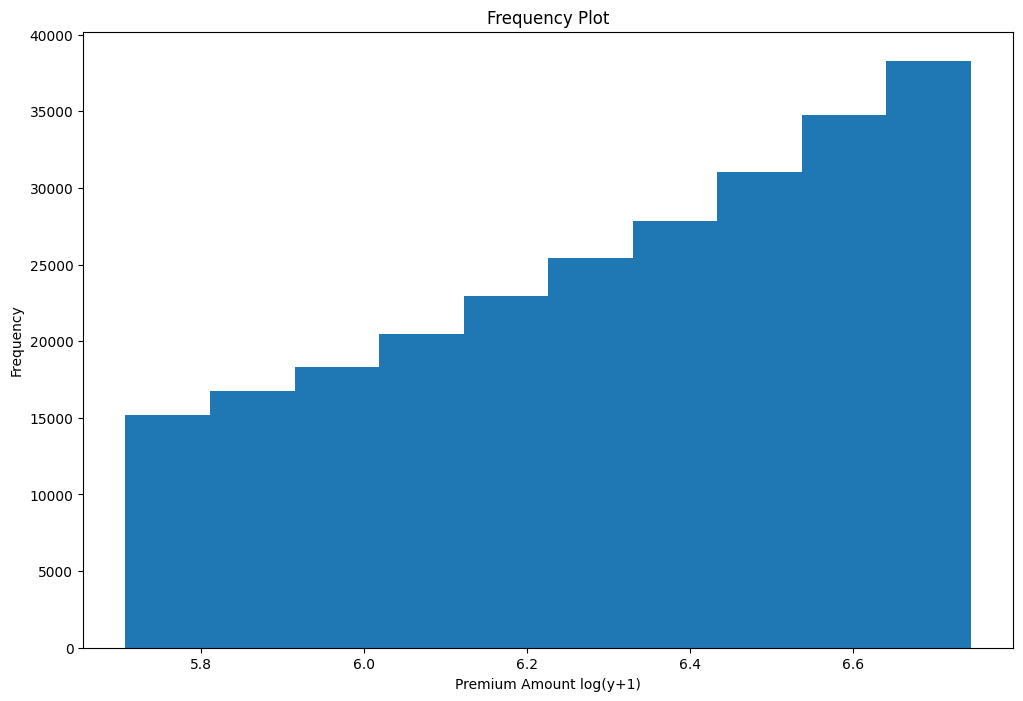

In [29]:
plt.figure(figsize=(12,8))
plt.hist(np.log1p(train['Credit Score']),bins=10)
plt.xlabel('Premium Amount log(y+1)')
plt.ylabel('Frequency')
plt.title('Frequency Plot')
plt.show()

In [ ]:
train['Insurance Duration'].value_counts().plot(kind='bar',color='skyblue')

In [ ]:
train.head()

In [ ]:
train['Customer Feedback'].value_counts().plot(kind='bar',color='skyblue')

In [ ]:
train['Smoking Status'].value_counts().plot(kind='bar',color='skyblue')

In [ ]:
train['Exercise Frequency'].value_counts().plot(kind='bar',color='skyblue')

In [ ]:
train['Property Type'].value_counts().plot(kind='bar',color='skyblue')

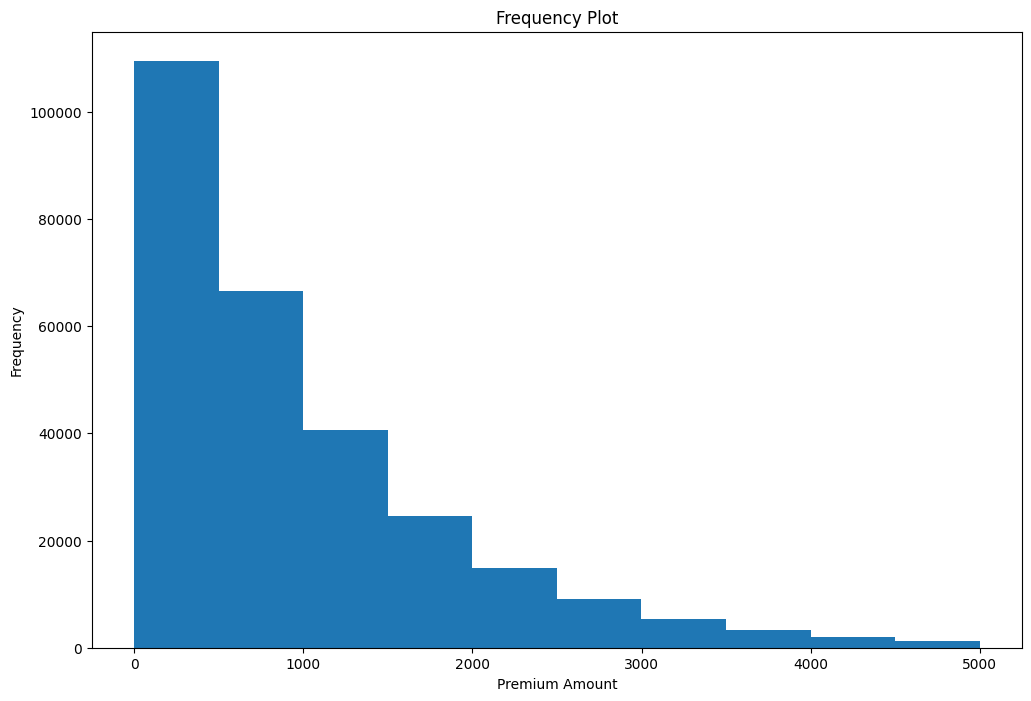

In [30]:
plt.figure(figsize=(12,8))
plt.hist(train['Premium Amount'],bins=10)
plt.xlabel('Premium Amount')
plt.ylabel('Frequency')
plt.title('Frequency Plot')
plt.show()

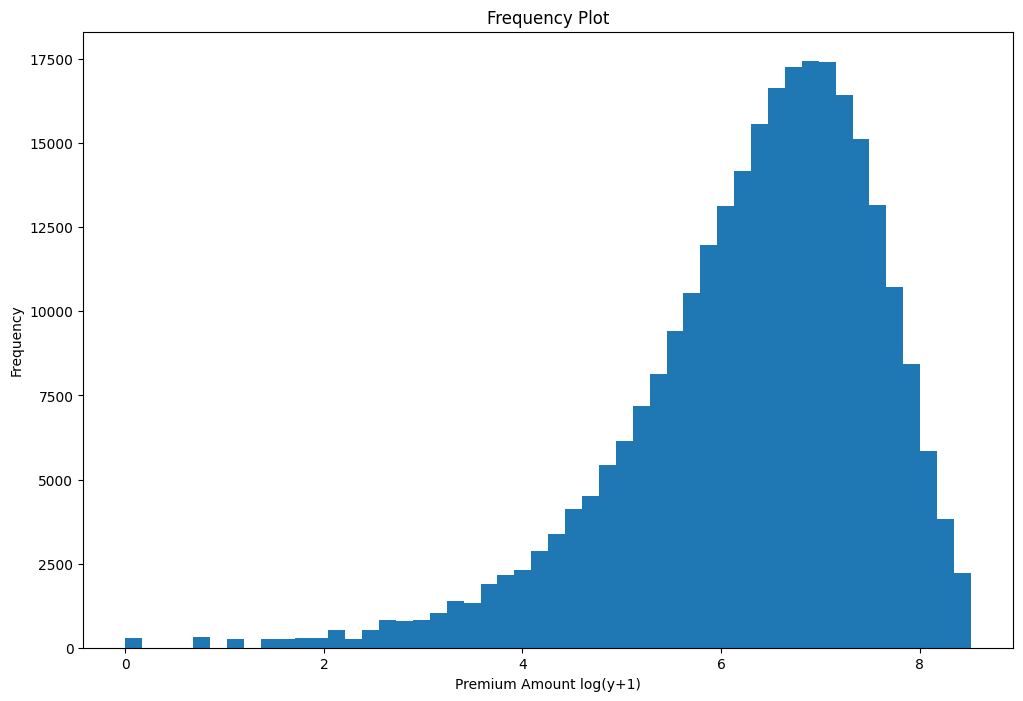

In [31]:
plt.figure(figsize=(12,8))
plt.hist(np.log1p(train['Premium Amount']),bins=50)
plt.xlabel('Premium Amount log(y+1)')
plt.ylabel('Frequency')
plt.title('Frequency Plot')
plt.show()

In [ ]:
# # Dataset Feature Distributions (train)
# fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(10, 8))
# columns_to_plot = train.columns
# for i, column in enumerate(columns_to_plot):
#     ax = axes.flatten()[i]
#     train[column].hist(ax=ax, bins=20, color='skyblue', edgecolor='black', linewidth=0.5)
#     ax.set_title(column, fontsize=9)
#     ax.tick_params(axis='both', which='major', labelsize=6)
# plt.suptitle('Dataset Feature Distributions (train)', fontsize=11)
# plt.tight_layout()
# plt.show()

In [16]:
train.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [32]:
from datetime import datetime, date 

In [33]:
def age(born): 
    born = str(born)
    born = datetime.strptime(born, "%Y-%m-%d %H:%M:%S.%f").date() 
    today = date.today() 
    return today.year - born.year - ((today.month,  
                                      today.day) < (born.month,  
                                                    born.day)) 


In [34]:
train['Policy Age'] = train['Policy Start Date'].apply(age)

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278860 entries, 0 to 278859
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Age                   274175 non-null  float64
 1   Gender                278860 non-null  object 
 2   Annual Income         264905 non-null  float64
 3   Marital Status        273841 non-null  object 
 4   Number of Dependents  250974 non-null  float64
 5   Education Level       278860 non-null  object 
 6   Occupation            197572 non-null  object 
 7   Health Score          268263 non-null  float64
 8   Location              278860 non-null  object 
 9   Policy Type           278860 non-null  object 
 10  Previous Claims       197572 non-null  float64
 11  Vehicle Age           278860 non-null  int64  
 12  Credit Score          250974 non-null  float64
 13  Insurance Duration    278860 non-null  int64  
 14  Premium Amount        277019 non-null  float64
 15  

In [36]:
def sort_columns(colList,df):
    catColumn = []
    numColumn = []
    for col in colList:
        if df[col].dtype == 'O':
            catColumn.append(col)
        else:
            if df[col].nunique() > 25:
                numColumn.append(col)
            else:
                catColumn.append(col)
    return catColumn,numColumn

catColumn,numColumn = sort_columns(train.columns,train)                
    

In [37]:
catColumn,numColumn

(['Gender',
  'Marital Status',
  'Number of Dependents',
  'Education Level',
  'Occupation',
  'Location',
  'Policy Type',
  'Previous Claims',
  'Vehicle Age',
  'Insurance Duration',
  'Policy Start Date',
  'Customer Feedback',
  'Smoking Status',
  'Exercise Frequency',
  'Property Type',
  'Policy Age'],
 ['Age', 'Annual Income', 'Health Score', 'Credit Score', 'Premium Amount'])

In [38]:
train['Age'].fillna(train['Age'].mean(),inplace=True)
train['Annual Income'].fillna(train['Annual Income'].mean(),inplace=True)
train['Marital Status'].fillna('Single',inplace=True)
train['Number of Dependents'].fillna(0.0,inplace=True)
train['Occupation'].fillna('Unknown',inplace=True)
train['Health Score'].fillna(train['Health Score'].mean(),inplace=True)
train['Previous Claims'].fillna(0.0,inplace=True)
train['Credit Score'].fillna(train['Credit Score'].mean(),inplace=True)
train['Customer Feedback'].fillna('Average',inplace=True)

In [42]:
train.isna().sum()

Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Premium Amount          0
Policy Start Date       0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
Policy Age              0
dtype: int64

In [40]:
train.dropna(how='any',inplace = True)

In [41]:
train.shape

(277019, 21)

In [43]:
features = ['Gender', 'Marital Status', 'Number of Dependents', 'Education Level',
       'Occupation', 'Location', 'Policy Type', 'Previous Claims',
       'Vehicle Age', 'Insurance Duration', 'Customer Feedback',
       'Smoking Status', 'Exercise Frequency', 'Property Type', 'Policy Age',
       'Age', 'Annual Income', 'Health Score', 'Credit Score']

In [44]:
X,y = train[features],train['Premium Amount']

In [45]:
X.shape,y.shape

((277019, 19), (277019,))

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [47]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((249317, 19), (27702, 19), (249317,), (27702,))

In [48]:
X_train.head()

,Gender,Marital Status,Number of Dependents,Education Level,Occupation,Location,Policy Type,Previous Claims,Vehicle Age,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Policy Age,Age,Annual Income,Health Score,Credit Score
54415,Female,Divorced,0.0,PhD,Unemployed,Urban,Premium,0.0,9,2,Average,Yes,Rarely,Apartment,1,38.0,165.000000,40.439584,703.0
101264,Male,Married,0.0,Bachelor's,Employed,Rural,Comprehensive,0.0,16,9,Good,Yes,Rarely,Condo,2,40.0,107446.000000,12.237150,480.0
217773,Male,Divorced,1.0,Bachelor's,Employed,Urban,Comprehensive,0.0,9,4,Poor,Yes,Weekly,Condo,0,26.0,20356.000000,1.924136,490.0
132758,Female,Single,0.0,Master's,Employed,Urban,Basic,0.0,2,9,Good,No,Weekly,House,1,35.0,42089.085329,18.600924,691.0
162273,Male,Divorced,1.0,Bachelor's,Employed,Suburban,Premium,2.0,2,1,Average,Yes,Weekly,Condo,4,23.0,65151.000000,20.845154,400.0


In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing 

In [50]:
catColumn = ['Gender',
  'Marital Status',
  'Number of Dependents',
  'Education Level',
  'Occupation',
  'Location',
  'Policy Type',
  'Previous Claims',
  'Vehicle Age',
  'Insurance Duration',
  'Customer Feedback',
  'Smoking Status',
  'Exercise Frequency',
  'Property Type',
  'Policy Age']

In [51]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249317 entries, 54415 to 122748
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                249317 non-null  object 
 1   Marital Status        249317 non-null  object 
 2   Number of Dependents  249317 non-null  float64
 3   Education Level       249317 non-null  object 
 4   Occupation            249317 non-null  object 
 5   Location              249317 non-null  object 
 6   Policy Type           249317 non-null  object 
 7   Previous Claims       249317 non-null  float64
 8   Vehicle Age           249317 non-null  int64  
 9   Insurance Duration    249317 non-null  int64  
 10  Customer Feedback     249317 non-null  object 
 11  Smoking Status        249317 non-null  object 
 12  Exercise Frequency    249317 non-null  object 
 13  Property Type         249317 non-null  object 
 14  Policy Age            249317 non-null  int64  
 15  A

In [52]:
from sklearn.preprocessing import LabelEncoder

object_columns = X_train.select_dtypes(include=['object']).columns
for col in object_columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    
# for col in catColumn:
#     encoder = OneHotEncoder()
#     X_train[col] = encoder.fit_transform(X_train[col])
#     X_test[col] = encoder.transform(X_test[col])

In [53]:

for col in X_train.columns:
    X_train[col] = np.log1p(X_train[col])
    X_test[col] = np.log1p(X_test[col])

y_train = np.log1p(y_train)
y_test = np.log1p(y_test)
    

In [55]:
X_train.head()

,Gender,Marital Status,Number of Dependents,Education Level,Occupation,Location,Policy Type,Previous Claims,Vehicle Age,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Policy Age,Age,Annual Income,Health Score,Credit Score
54415,0.000000,0.000000,0.000000,1.386294,1.098612,1.098612,1.098612,0.000000,2.302585,1.098612,0.000000,0.693147,1.098612,0.000000,0.693147,3.663562,5.111988,3.724237,6.556778
101264,0.693147,0.693147,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,2.833213,2.302585,0.693147,0.693147,1.098612,0.693147,1.098612,3.713572,11.584753,2.583027,6.175867
217773,0.693147,0.000000,0.693147,0.000000,0.000000,1.098612,0.693147,0.000000,2.302585,1.609438,1.098612,0.693147,1.386294,0.693147,0.000000,3.295837,9.921180,1.072999,6.196444
132758,0.000000,1.098612,0.000000,1.098612,0.000000,1.098612,0.000000,0.000000,1.098612,2.302585,0.693147,0.000000,1.386294,1.098612,0.693147,3.583519,10.647567,2.975577,6.539586
162273,0.693147,0.000000,0.693147,0.000000,0.000000,0.693147,1.098612,1.098612,1.098612,0.693147,0.000000,0.693147,1.386294,0.693147,1.609438,3.178054,11.084478,3.083979,5.993961


In [56]:
X_test.head()

,Gender,Marital Status,Number of Dependents,Education Level,Occupation,Location,Policy Type,Previous Claims,Vehicle Age,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Policy Age,Age,Annual Income,Health Score,Credit Score
123288,0.000000,0.000000,0.693147,1.386294,0.693147,0.000000,0.000000,0.000000,1.609438,1.609438,0.000000,0.000000,1.098612,0.000000,0.693147,4.043051,10.680286,2.577711,5.924256
53015,0.000000,0.693147,1.386294,0.693147,1.386294,0.693147,0.000000,0.000000,2.708050,1.098612,0.693147,0.693147,0.693147,0.000000,1.098612,4.025352,9.410993,1.365466,6.703188
227953,0.693147,1.098612,1.386294,1.098612,0.000000,0.693147,1.098612,0.693147,2.484907,1.791759,0.000000,0.693147,0.693147,0.693147,0.693147,3.737670,8.809564,3.897382,6.257668
243052,0.000000,0.693147,1.386294,1.098612,0.693147,0.693147,0.000000,0.000000,0.000000,2.302585,1.098612,0.693147,0.693147,1.098612,1.609438,3.178054,10.686361,3.358231,6.597146
197261,0.693147,0.000000,0.693147,1.386294,1.098612,0.000000,0.000000,0.000000,2.564949,1.609438,0.000000,0.693147,1.098612,0.693147,1.098612,2.995732,10.141244,2.681217,5.843544


In [57]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((249317, 19), (27702, 19), (249317,), (27702,))

In [59]:
!pip install lightgbm

  Using cached lightgbm-4.5.0.tar.gz (1.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for lightgbm: filename=lightgbm-4.5.0-py3-none-linux_x86_64.whl size=3086024 sha256=56682dbe9ca62a468c2646e8a46799993301ef48d56b3466deac4eacbcbe1ee0
  Stored in directory: /home/ghosh.shu/.cache/pip/wheels/7c/16/bf/61bc6295609c0752bc0f5b774a41f3413bca3afe3a73d2e47d
Successfully built lightgbm


In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
# from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

ModuleNotFoundError: No module named 'xgboost'

In [60]:
%%time
# model = XGBRegressor(random_state=42)

from lightgbm import LGBMRegressor

# model = RandomForestRegressor(random_state=0)

model = LGBMRegressor(random_state=42)


# Hyperparameters for XGBoost tuning

# params = {     
#     'n_estimators': [150],
#     'max_depth': [7],
# }

params = {     
    'n_estimators': [150],
    'max_depth': [7],       
    'num_leaves': [70],
    'objective': ['regression'],
    'learning_rate': [0.05],
    'boosting_type': ['gbdt']
}

# Set up GridSearchCV for hyperparameter tuning
search = GridSearchCV(
    estimator = model,              
    param_grid = params,            
    cv = 3,                 # k-fold cross-validation
    verbose = 3,                    
    scoring = "neg_root_mean_squared_error"  # evaluation metric
)

# Perform the grid search with cross-validation
search.fit(X_train, y_train)

print("Best params: ", search.best_params_)
print("Best RMSLE: ", -search.best_score_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003647 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 894
[LightGBM] [Info] Number of data points in the train set: 166211, number of used features: 19
[LightGBM] [Info] Start training from score 6.320855
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

In [35]:
params_xgb = {}
# 'lambda': 0.7044156083795233, 'alpha': 9.681476940192473, 'colsample_bytree': 0.3, 'subsample': 0.8,
#            'learning_rate': 0.015, 'max_depth': 7,'random_state': 48,'n_estimators': 300

params_lgb = {'reg_alpha': 4.973064761998367, 'reg_lambda': 0.06365096912006087,'colsample_bytree': 0.24,
              'subsample': 0.8, 'learning_rate': 0.015, 'max_depth': 10,
              'cat_smooth': 18,'metric': 'rmse', 'random_state': 48,'n_estimators': 400}


In [31]:
from sklearn.linear_model import ElasticNet, Lasso,LinearRegression,RidgeCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [37]:
%%time
pred1 = np.zeros(X_train.shape[0])
pred2 = np.zeros(X_train.shape[0])
pred3 = np.zeros(X_train.shape[0])
pred4 = np.zeros(X_train.shape[0])

test1 = np.zeros(X_test.shape[0])
test2 = np.zeros(X_test.shape[0])
test3 = np.zeros(X_test.shape[0])
test4 = np.zeros(X_test.shape[0])

kf = KFold(n_splits=3,random_state=48,shuffle=True)
n=0

for trn_idx, test_idx in kf.split(X_train,y_train):
    print(f"fold: {n+1}")
    X_tr,X_val=X_train.iloc[trn_idx],X_train.iloc[test_idx]
    y_tr,y_val=y_train.iloc[trn_idx],y_train.iloc[test_idx]
    
    
    model1 = lgb.LGBMRegressor(random_state=42,
                     n_estimators=150,
                     max_depth=7,
                     num_leaves=70,
                     objective='regression',
                     learning_rate=0.05,
                     boosting_type='gbdt')
    model1.fit(X_tr,y_tr,eval_set=[(X_val,y_val)])
    pred1[test_idx] = model1.predict(X_val)
    test1 += model1.predict(X_test)/kf.n_splits
    rmse1 = mean_squared_error(y_val, model1.predict(X_val))
    print(": model1 rmse = {}".format(rmse1))

#     model2 = ElasticNet(alpha=0.00001)
#     model2.fit(X_tr,y_tr)
#     pred2[test_idx] = model2.predict(X_val)
#     test2 += model2.predict(X_test)/kf.n_splits
#     rmse2 = mean_squared_error(y_val, model2.predict(X_val))
#     print(": model2 rmse = {}".format(rmse2))
    
#     model3 = LinearRegression()
#     model3.fit(X_tr,y_tr)
#     pred3[test_idx] = model3.predict(X_val)
#     test3 += model3.predict(X_test)/kf.n_splits
#     rmse3 = mean_squared_error(y_val, model3.predict(X_val))
#     print(": model3 rmse = {}".format(rmse3))
    
    model4 = xgb.XGBRegressor(**params_xgb)
    model4.fit(X_tr,y_tr,eval_set=[(X_val,y_val)])
    pred4[test_idx] = model4.predict(X_val)
    test4 += model4.predict(X_test)/kf.n_splits
    rmse4 = mean_squared_error(y_val, model4.predict(X_val))
    print(": model4 rmse = {}".format(rmse4))
    print(": average all models rmse = {}".format((rmse1+rmse4)/2))

    n+=1


fold: 1
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017083 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 892
[LightGBM] [Info] Number of data points in the train set: 799195, number of used features: 19
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 6.594165
: model1 rmse = 1.108810828157015
[0]	validation_0-rmse:1.07985
[1]	validation_0-rmse:1.07042
[2]	validation_0-rmse:1.06383
[3]	validation_0-rmse:1.06035
[4]	validation_0-rmse:1.05866
[5]	validation_0-rmse:1.05752
[6]	validation_0-rmse:1.05657
[7]	validation_0-rmse:1.05599
[8]	validation_0-rmse:1.05570
[9]	validation_0-rmse:1.05549
[10]	validation_0-rmse:1.05514
[11]	validation_0-rmse:1.05498
[12]	validation_0-rmse:1.05492

In [40]:
model = lgb.LGBMRegressor(random_state=42,
                     n_estimators=150,
                     max_depth=7,
                     num_leaves=70,
                     objective='regression',
                     learning_rate=0.05,
                     boosting_type='gbdt')
model.fit(X_train,y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025565 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 890
[LightGBM] [Info] Number of data points in the train set: 1198793, number of used features: 19
[LightGBM] [Info] Start training from score 6.593945


LGBMRegressor(learning_rate=0.05, max_depth=7, n_estimators=150, num_leaves=70,
              objective='regression', random_state=42)

Best params:  {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 100, 'reg_alpha': 0.01, 'reg_lambda': 1}
Best RMSLE:  1.0529700400499271

In [41]:
target_column = 'Premium Amount'

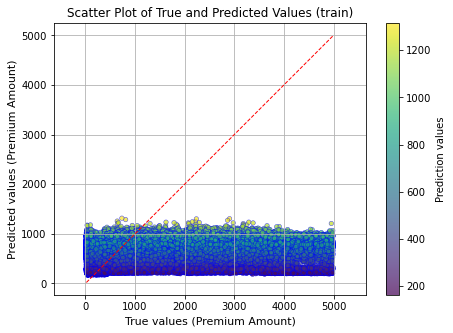

In [43]:
# Scatter Plot of True and Predicted Values (Training Target)
y_true = np.expm1(y_train)
y_pred = np.expm1(model.predict(X_train))

# Plot preparation
plt.figure(figsize=(7, 5))
plt.scatter(y_true, y_pred, c=y_pred, cmap='viridis', edgecolors='blue', s=20, alpha=0.7, linewidth=0.5)
cb = plt.colorbar()
cb.set_label('Prediction values')

# Plot the diagonal line
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--', linewidth=1.0)
plt.axis('equal')

# # Add RMSLE text to the plot
# rmsle_text = f'RMSLE : {round(-search.best_score_, 4)}'
# plt.text(0.10, 0.90, rmsle_text, transform=plt.gca().transAxes, fontsize=11, color='brown')

# Labels and title
plt.xlabel(f'True values ({target_column})', fontsize=11)
plt.ylabel(f'Predicted values ({target_column})', fontsize=11)
plt.title('Scatter Plot of True and Predicted Values (train)', fontsize=12)
plt.grid(True)
plt.show()

In [15]:
X_train,y_train = train[['Gender', 'Marital Status', 'Number of Dependents', 'Education Level',
       'Occupation', 'Location', 'Policy Type', 'Previous Claims',
       'Vehicle Age', 'Insurance Duration', 'Customer Feedback',
       'Smoking Status', 'Exercise Frequency', 'Property Type', 'Policy Age',
       'Age', 'Annual Income', 'Health Score', 'Credit Score']],train['Premium Amount']

In [16]:
X_test = pd.read_csv('test.csv')

In [17]:
X_test.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,2023-10-25 15:21:39.134960,Poor,Yes,Daily,House
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,NaN,14.0,755.0,7.0,2021-11-26 15:21:39.259788,Average,No,Weekly,House


In [18]:
X_train['Vehicle Age'].mode()[0]

17.0

In [19]:
X_test.shape

(800000, 20)

In [20]:
X_test['Policy Age'] = X_test['Policy Start Date'].apply(age)

In [21]:
X_test['Age'].fillna(train['Age'].mean(),inplace=True)
X_test['Annual Income'].fillna(train['Annual Income'].mean(),inplace=True)
X_test['Marital Status'].fillna('Single',inplace=True)
X_test['Number of Dependents'].fillna(0.0,inplace=True)
X_test['Occupation'].fillna('Unknown',inplace=True)
X_test['Health Score'].fillna(train['Health Score'].mean(),inplace=True)
X_test['Previous Claims'].fillna(0.0,inplace=True)
X_test['Credit Score'].fillna(train['Credit Score'].mean(),inplace=True)
X_test['Customer Feedback'].fillna('Average',inplace=True)
X_test['Vehicle Age'].fillna(train['Vehicle Age'].mode()[0],inplace=True)
X_test['Insurance Duration'].fillna(train['Insurance Duration'].mode()[0],inplace=True)

In [22]:
X_test.isna().sum()

id                      0
Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Policy Start Date       0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
Policy Age              0
dtype: int64

In [23]:
submissionDF = X_test['id']

In [24]:
X_test = X_test[['Gender', 'Marital Status', 'Number of Dependents', 'Education Level',
       'Occupation', 'Location', 'Policy Type', 'Previous Claims',
       'Vehicle Age', 'Insurance Duration', 'Customer Feedback',
       'Smoking Status', 'Exercise Frequency', 'Property Type', 'Policy Age',
       'Age', 'Annual Income', 'Health Score', 'Credit Score']]

In [25]:
submissionDF.shape

(800000,)

In [38]:
type(submissionDF)

pandas.core.series.Series

In [27]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                800000 non-null  object 
 1   Marital Status        800000 non-null  object 
 2   Number of Dependents  800000 non-null  float64
 3   Education Level       800000 non-null  object 
 4   Occupation            800000 non-null  object 
 5   Location              800000 non-null  object 
 6   Policy Type           800000 non-null  object 
 7   Previous Claims       800000 non-null  float64
 8   Vehicle Age           800000 non-null  float64
 9   Insurance Duration    800000 non-null  float64
 10  Customer Feedback     800000 non-null  object 
 11  Smoking Status        800000 non-null  object 
 12  Exercise Frequency    800000 non-null  object 
 13  Property Type         800000 non-null  object 
 14  Policy Age            800000 non-null  int64  
 15  

In [28]:
from sklearn.preprocessing import LabelEncoder

object_columns = X_train.select_dtypes(include=['object']).columns
for col in object_columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

In [29]:
for col in X_train.columns:
    X_train[col] = np.log1p(X_train[col])
    X_test[col] = np.log1p(X_test[col])
y_train = np.log1p(y_train)

In [30]:
X_train.head()

,Gender,Marital Status,Number of Dependents,Education Level,Occupation,Location,Policy Type,Previous Claims,Vehicle Age,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Policy Age,Age,Annual Income,Health Score,Credit Score
0,0.000000,0.693147,0.693147,0.000000,0.693147,1.098612,1.098612,1.098612,2.890372,1.791759,1.098612,0.000000,1.386294,1.098612,0.000000,2.995732,9.215328,3.161194,5.921578
1,0.000000,0.000000,1.386294,1.098612,1.386294,0.000000,0.693147,0.693147,2.564949,1.098612,0.000000,0.693147,0.693147,1.098612,0.693147,3.688879,10.363409,2.807578,6.543912
2,0.693147,0.000000,1.386294,0.693147,0.693147,0.693147,1.098612,0.693147,2.708050,1.386294,0.693147,0.693147,1.386294,1.098612,0.693147,3.178054,10.150465,3.874893,6.386752
3,0.693147,0.693147,1.098612,0.000000,1.386294,0.000000,0.000000,0.693147,0.000000,0.693147,1.098612,0.693147,0.000000,0.000000,0.000000,3.091042,11.862568,2.479739,5.908083
4,0.693147,1.098612,0.693147,0.000000,0.693147,0.000000,1.098612,0.000000,2.197225,1.609438,1.098612,0.693147,1.386294,1.098612,1.386294,3.091042,10.587897,3.062273,6.395262


In [31]:
X_test.head()

,Gender,Marital Status,Number of Dependents,Education Level,Occupation,Location,Policy Type,Previous Claims,Vehicle Age,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Policy Age,Age,Annual Income,Health Score,Credit Score
0,0.000000,1.098612,1.609438,0.000000,0.693147,0.000000,0.000000,0.000000,2.995732,0.693147,1.098612,0.693147,1.386294,1.098612,0.693147,3.367296,7.745436,2.158482,6.386753
1,0.000000,0.693147,1.098612,1.098612,0.693147,0.693147,1.098612,0.000000,2.708050,2.197225,0.693147,0.693147,1.098612,0.000000,0.000000,3.465736,11.744291,2.665934,5.921578
2,0.000000,0.000000,0.000000,1.386294,1.098612,1.098612,0.693147,0.000000,2.833213,2.302585,0.000000,0.693147,0.693147,0.693147,0.693147,3.871201,9.746424,3.232957,6.709304
3,0.000000,0.000000,1.386294,1.386294,0.693147,0.693147,0.693147,0.693147,1.386294,1.791759,1.098612,0.693147,0.000000,1.098612,0.693147,3.367296,10.323020,1.814210,6.647688
4,0.693147,0.000000,1.098612,0.693147,1.098612,0.693147,1.098612,0.000000,2.708050,2.079442,0.000000,0.000000,1.386294,1.098612,1.386294,3.218876,9.293210,2.552889,6.628041


In [32]:
y_train[:5]

0    7.962067
1    7.302496
2    6.342121
3    6.641182
4    7.612337
Name: Premium Amount, dtype: float64

In [33]:
%%time
from lightgbm import LGBMRegressor
model = LGBMRegressor(random_state=42,
                     n_estimators=150,
                     max_depth=7,
                     num_leaves=70,
                     objective='regression',
                     learning_rate=0.05,
                     boosting_type='gbdt')
model.fit(X_train,y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032213 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 891
[LightGBM] [Info] Number of data points in the train set: 1199993, number of used features: 19
[LightGBM] [Info] Start training from score 6.593887
CPU times: user 26.8 s, sys: 506 ms, total: 27.3 s
Wall time: 8.59 s


LGBMRegressor(learning_rate=0.05, max_depth=7, n_estimators=150, num_leaves=70,
              objective='regression', random_state=42)

In [35]:
y_pred = np.expm1(model.predict(X_test))

In [36]:
y_pred[:10]

array([668.15370473, 802.24111155, 799.69978999, 801.74498509,
       762.70737784, 746.57567437, 965.52200702, 648.96032875,
       284.39870266, 825.55108975])

In [37]:
type(y_pred)

numpy.ndarray

In [39]:
series = pd.Series(y_pred, name='Premium Amount')

# Concatenate the DataFrame and Series along columns (axis=1)
result = pd.concat([submissionDF, series], axis=1)

In [40]:
result.shape

(800000, 2)

In [41]:
result.head()

,id,Premium Amount
0,1200000,668.153705
1,1200001,802.241112
2,1200002,799.699790
3,1200003,801.744985
4,1200004,762.707378


In [42]:
result.to_csv('submission.csv',index=False)

In [ ]:
!pip install lightgbm

In [ ]:
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
}

In [ ]:
%%time
from sklearn.metrics import mean_squared_error as mse
from lightgbm import LGBMRegressor

model = LGBMRegressor(metric='rmse',
                     objective= 'regression',
    boosting_type= 'gbdt',
    num_leaves= 31,
    learning_rate= 0.05,
    feature_fraction= 0.9,)

model.fit(X_train, y_train)

In [ ]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [ ]:
y_test[:10]

In [ ]:
pd.Series(pred_test[:10])

In [ ]:
print('Training RMSE:', np.sqrt(mse(y_train, pred_train)))
print('Testing RMSE:', np.sqrt(mse(y_test, pred_test)))